In [1]:
import os

from matplotlib import pyplot as plt
import pandas as pd

from data_loading import (load_isoform_and_paralog_y2h_data,
                          load_y1h_pdi_data,
                          load_m1h_activation_data,
                          load_valid_isoform_clones,
                          load_rna_expression_data,
                          load_seq_comparison_data,
                          load_annotated_6k_collection)
from plotting import (y2h_ppi_per_tf_gene_plot,
                      y1h_pdi_per_tf_gene_plot,
                      m1h_activation_per_tf_gene_plot)

In [23]:
y2h = load_isoform_and_paralog_y2h_data(add_missing_data=False)
for gene_name in isoforms['gene'].unique():
    y2h_ppi_per_tf_gene_plot(gene_name, data=y2h)
    plt.savefig('../../figures/per_gene/y2h_profile/' + gene_name + '_summary.pdf',
                bbox_inches='tight')
    plt.close(plt.gcf())

In [25]:
df = pd.read_csv('../../data/internal/isoform_clones.tsv', sep='\t')
df.loc[df['gene'] == 'WT1', :]

,gene,clone_acc,dup_idx
522,WT1,WT1|1/6|12B12,NaN
523,WT1,WT1|2/6|12C12,NaN
524,WT1,WT1|3/6|12A12,7.0
525,WT1,WT1|4/6|12A11,7.0
526,WT1,WT1|5/6|11H05,7.0
527,WT1,WT1|6/6|10G06,NaN


In [2]:
y2h = load_isoform_and_paralog_y2h_data(add_missing_data=True)
y1h = load_y1h_pdi_data(add_missing_data=True)
m1h = load_m1h_activation_data(add_missing_data=True)
# rna = load_rna_expression_data()
isoforms = load_valid_isoform_clones()
#idents = load_seq_comparison_data()

In [4]:
tfs = load_annotated_6k_collection()

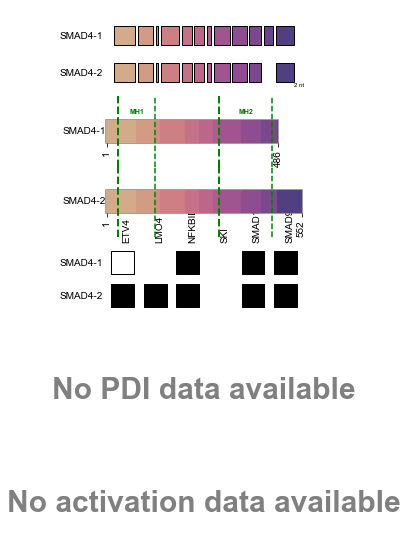

In [21]:
def tf_gene_summary_plot(gene_name):
    """
    

    """
    if gene_name not in tfs:
        return
    n_iso_y2h = y2h.loc[(y2h['category'] == 'tf_isoform_ppis') &
                        (y2h['ad_gene_symbol'] == gene_name),
                        'ad_clone_acc'].nunique()
    n_partner_y2h = y2h.loc[(y2h['category'] == 'tf_isoform_ppis') &
                            (y2h['ad_gene_symbol'] == gene_name),
                            'db_gene_symbol'].nunique()
    n_iso_y1h = (y1h['tf'] == gene_name).sum()
    n_partner_y1h = y1h.loc[(y1h['tf'] == gene_name), y1h.columns[2:]].any(axis=0).sum()
    fig, axes = plt.subplots(5, 1)
    fig.set_size_inches(max(3.5, n_partner_y2h * 0.2, n_partner_y1h * 0.2),
                        max(10, n_iso_y2h * 0.2, n_iso_y1h * 0.2))
    
    tfs[gene_name].exon_diagram(ax=axes[0])
    tfs[gene_name].protein_diagram(ax=axes[1])
    y2h_ppi_per_tf_gene_plot(gene_name, data=y2h, ax=axes[2])
    y1h_pdi_per_tf_gene_plot(gene_name, data=y1h, ax=axes[3])
    m1h_activation_per_tf_gene_plot(gene_name, data=m1h, ax=axes[4])
    os.makedirs('../../figures/per_tf_gene', exist_ok=True)
    plt.savefig('../../figures/per_tf_gene/' + gene_name + '_summary.pdf',
                bbox_inches='tight')
    plt.close(fig)


#for gene_name in isoforms['gene'].unique():
#    tf_gene_summary_plot(gene_name)
tf_gene_summary_plot('SMAD4')

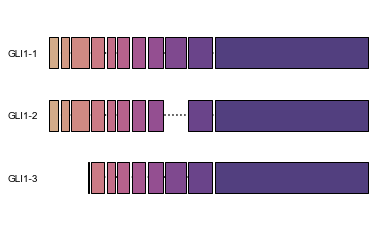

In [8]:
# what's wrong with ETV6 GATA3  GLI1 HMGA1 PRDM16 SIX1 SMAD4 TP63???
# what's going on with protein diagram of SMAD4?
tfs['GLI1'].exon_diagram()

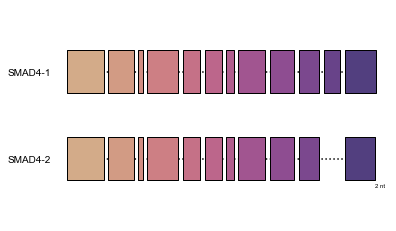

In [14]:
tfs['SMAD4'].exon_diagram()

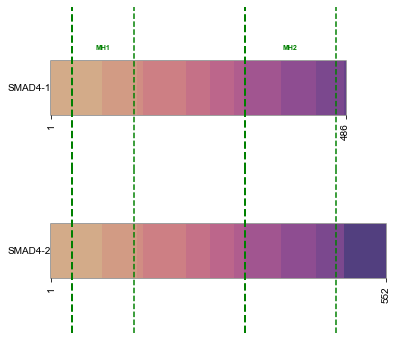

In [15]:
tfs['SMAD4'].protein_diagram()

In [20]:
(len(tfs['SMAD4']['SMAD4-1'].aa_seq),
 len(tfs['SMAD4']['SMAD4-2'].aa_seq))

(486, 552)